# Tara Rebin

In [1]:
# imports
from importlib import reload
import numpy as np
import pandas
import datetime

from matplotlib import pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy

import seaborn as sns

from oceancolor.tara import io
from oceancolor.tara import spectra

# Load the Table

In [2]:
tara_db = io.load_tara_db()

In [3]:
tara_db.keys()

Index(['date', 'time', 'lat', 'lon', 'Wt', 'sal', 'ap405.5', 'ap410.1',
       'ap414.4', 'ap419',
       ...
       'sig_cp694.9', 'sig_cp707.8', 'sig_cp711', 'sig_cp714.2', 'sig_cp720.5',
       'sig_cp723.2', 'sig_cp726', 'sig_cp728.8', 'sig_cp731.6',
       'sig_cp734.5'],
      dtype='object', length=2332)

# Load the Spectra

In [4]:
wv_nm, values, err_vals = spectra.spectra_from_table(tara_db)

In [5]:
values.shape

(578, 302779)

In [6]:
wv_nm[0:20], wv_nm[-10:]

(array([400.7, 400.9, 403.7, 403.9, 404.6, 404.8, 405.1, 405.3, 405.5,
        406. , 407.6, 407.8, 408.2, 408.7, 409.4, 410.1, 410.9, 411.2,
        412.5, 413.5]),
 array([744.3, 744.9, 745.4, 745.6, 746.4, 747.3, 747.6, 748.1, 748.4,
        750. ]))

## How well populated are the spectra?

In [7]:
gd_value_b = np.isfinite(values) & (values>0)
gd_value = gd_value_b.astype(int)

In [8]:
gd_value

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
values

array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       ...,
       [-0.0024, -0.0034, -0.003 , ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [-0.0027, -0.0031, -0.0029, ...,     nan,     nan,     nan]])

## Inspect

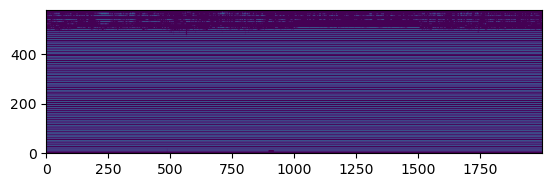

In [10]:
plt.clf()
ax = plt.gca()
ax.imshow(gd_value[:,0:2000], origin='lower')
plt.show()

In [11]:
np.sum(gd_value[:,301500])

79

In [12]:
wv_nm[gd_value_b[:,30000]]

array([400.7, 405.1, 409.4, 413.5, 417.8, 422.6, 427.6, 432. , 436.4,
       440.7, 445.1, 450. , 454.8, 459.2, 463.6, 468.2, 473.1, 478.2,
       483.1, 487.8, 492.1, 496.7, 501.2, 506.1, 510.7, 515.8, 520.8,
       525.3, 529.9, 534.4, 538.7, 543. , 547.6, 551.9, 556.5, 560.8,
       565. , 569. , 574.1, 578.1, 582.4, 586.6, 591. , 595.2, 599.9,
       604.5, 608.8, 613.5, 618.2, 622.5, 626.9, 631.2, 635.5, 639.8,
       644.3, 648.6, 652.9, 657.3, 661.6, 666. , 670.3, 674.5, 678.6,
       682.7, 686.6, 690.5, 694.1, 697.9, 701.5, 705. , 708.4])

In [13]:
wvs = wv_nm[gd_value_b[:,30000]]
dwv = wvs - np.roll(wvs,1)
dwv

array([-307.7,    4.4,    4.3,    4.1,    4.3,    4.8,    5. ,    4.4,
          4.4,    4.3,    4.4,    4.9,    4.8,    4.4,    4.4,    4.6,
          4.9,    5.1,    4.9,    4.7,    4.3,    4.6,    4.5,    4.9,
          4.6,    5.1,    5. ,    4.5,    4.6,    4.5,    4.3,    4.3,
          4.6,    4.3,    4.6,    4.3,    4.2,    4. ,    5.1,    4. ,
          4.3,    4.2,    4.4,    4.2,    4.7,    4.6,    4.3,    4.7,
          4.7,    4.3,    4.4,    4.3,    4.3,    4.3,    4.5,    4.3,
          4.3,    4.4,    4.3,    4.4,    4.3,    4.2,    4.1,    4.1,
          3.9,    3.9,    3.6,    3.8,    3.6,    3.5,    3.4])

----

# Test

In [14]:
reload(spectra)
wv_grid = np.arange(400., 705., 5.)
rebin_wave,rebin_spectra = spectra.rebin_to_grid(wv_nm, values, err_vals, wv_grid)

/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:247: RuntimeWarning: invalid value encountered in divide
  isum = np.nansum(values[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)


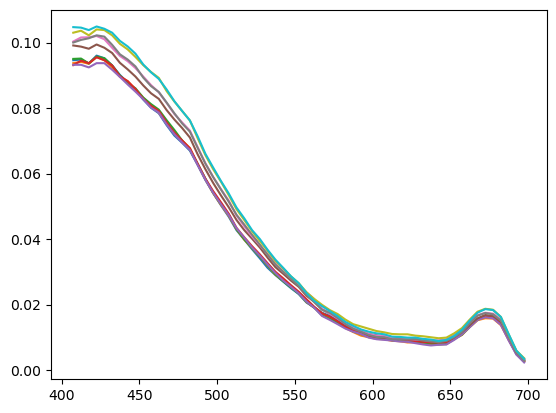

In [16]:
plt.clf()
ax = plt.gca()
#
for ii in range(10):
    ax.plot(rebin_wave, rebin_spectra[:,ii])
plt.show()

In [17]:
rebin_wave.size

60